# View Raw Data

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("../raw/202001-citibike-tripdata.csv")
df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,789,2020-01-01 00:00:55.3900,2020-01-01 00:14:05.1470,504,1 Ave & E 16 St,40.732219,-73.981656,307,Canal St & Rutgers St,40.714275,-73.989900,30326,Subscriber,1992,1
1,1541,2020-01-01 00:01:08.1020,2020-01-01 00:26:49.1780,3423,West Drive & Prospect Park West,40.661063,-73.979453,3300,Prospect Park West & 8 St,40.665147,-73.976376,17105,Customer,1969,1
2,1464,2020-01-01 00:01:42.1400,2020-01-01 00:26:07.0110,3687,E 33 St & 1 Ave,40.743227,-73.974498,259,South St & Whitehall St,40.701221,-74.012342,40177,Subscriber,1963,1
3,592,2020-01-01 00:01:45.5610,2020-01-01 00:11:38.1550,346,Bank St & Hudson St,40.736529,-74.006180,490,8 Ave & W 33 St,40.751551,-73.993934,27690,Subscriber,1980,1
4,702,2020-01-01 00:01:45.7880,2020-01-01 00:13:28.2400,372,Franklin Ave & Myrtle Ave,40.694546,-73.958014,3637,Fulton St & Waverly Ave,40.683239,-73.965996,32583,Subscriber,1982,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240591,1587,2020-01-31 23:59:26.8820,2020-02-01 00:25:54.4890,3244,University Pl & E 8 St,40.731437,-73.994903,3092,Berry St & N 8 St,40.719009,-73.958525,40662,Subscriber,1990,1
1240592,222,2020-01-31 23:59:32.6410,2020-02-01 00:03:15.4720,383,Greenwich Ave & Charles St,40.735238,-74.000271,383,Greenwich Ave & Charles St,40.735238,-74.000271,28722,Subscriber,1983,1
1240593,163,2020-01-31 23:59:39.1780,2020-02-01 00:02:23.0400,150,E 2 St & Avenue C,40.720874,-73.980858,411,E 6 St & Avenue D,40.722281,-73.976687,32530,Subscriber,1958,2
1240594,327,2020-01-31 23:59:49.2310,2020-02-01 00:05:16.3790,483,E 12 St & 3 Ave,40.732233,-73.988900,3718,E 11 St & Avenue B,40.727464,-73.979504,15314,Customer,1994,1


In [7]:
df.nunique()

tripduration                  7403
starttime                  1240056
stoptime                   1240094
start station id               893
start station name             893
start station latitude         918
start station longitude        917
end station id                 896
end station name               896
end station latitude           920
end station longitude          920
bikeid                       13049
usertype                         2
birth year                      98
gender                           3
dtype: int64

<AxesSubplot:>

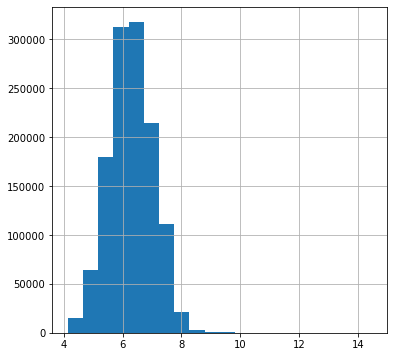

In [17]:
fig, ax = plt.subplots(figsize=(6, 6))
df.tripduration.apply(np.log1p).hist(bins=20, ax=ax)

<AxesSubplot:xlabel='usertype'>

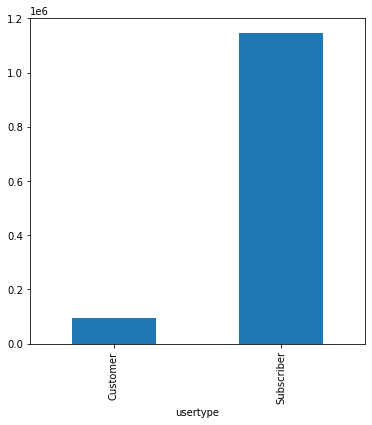

In [18]:
fig, ax = plt.subplots(figsize=(6, 6))
df.groupby("usertype").size().plot.bar(ax=ax)

<AxesSubplot:xlabel='birth year'>

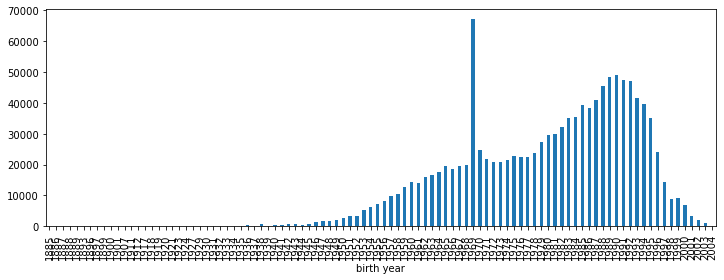

In [21]:
fig, ax = plt.subplots(figsize=(12, 4))
df.groupby("birth year").size().plot.bar(ax=ax)

<AxesSubplot:xlabel='gender'>

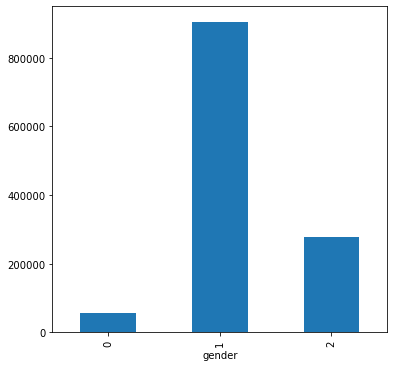

In [23]:
fig, ax = plt.subplots(figsize=(6, 6))
df.groupby("gender").size().plot.bar(ax=ax)

<AxesSubplot:xlabel='starttime'>

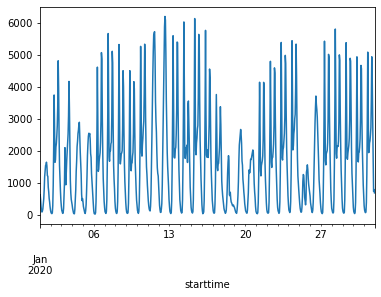

In [35]:
fig, ax = plt.subplots(figsize=(12, 4))
df["starttime"] = pd.to_datetime(df["starttime"])
df.set_index("starttime").resample("1H").count().iloc[:, 0].plot(ax=ax)